# Kaggle Titanic
[데이터 다운로드](https://www.kaggle.com/competitions/titanic/data)


코드 부분은 지우고 결과 부분만 남겨 뒀습니다.  
남아있는 결과와 동일하게 출력될 수 있도록 코드를 작성해보세요!  

### 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

### Data Load

In [3]:
train = pd.read_csv("train.csv", encoding="utf-8")
train.shape

(891, 12)

### 기본 정보

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결측치 확인

<AxesSubplot:>

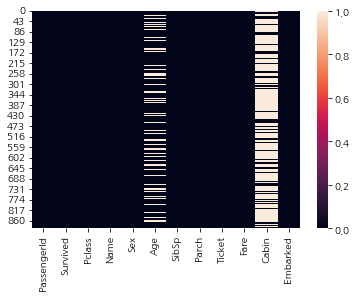

In [16]:
sns.heatmap(train.isnull())

In [13]:
train[["Age","Cabin","Embarked"]].isnull().mean()

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

### 생존자

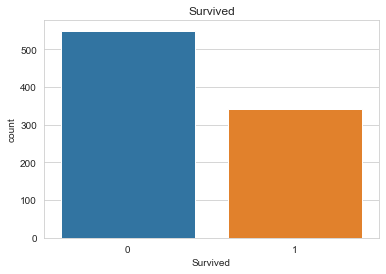

In [60]:
sns.countplot(data=train,x="Survived")
plt.title("Survived")
plt.show()

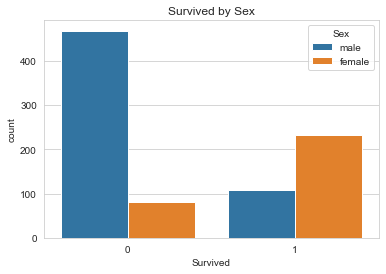

In [59]:
sns.countplot(data=train,x="Survived",hue="Sex")
plt.grid(True,axis='y')
plt.title("Survived by Sex")
plt.show()


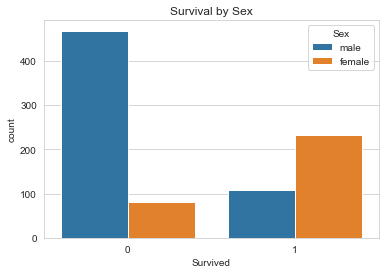

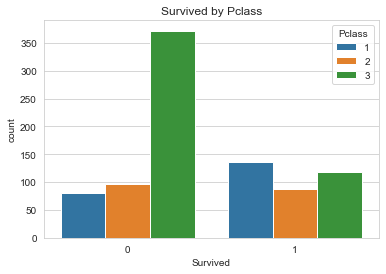

In [58]:
sns.countplot(data=train,x="Survived", hue="Pclass")
plt.title("Survived by Pclass")
plt.show()

### Data Cleaning
#### Age

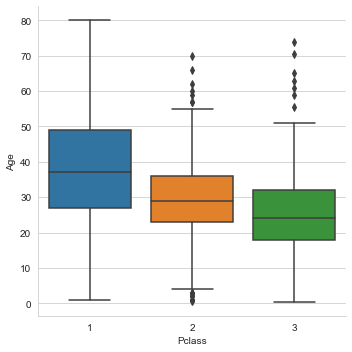

In [57]:
sns.catplot(data=train,x="Pclass",y="Age",kind="box")


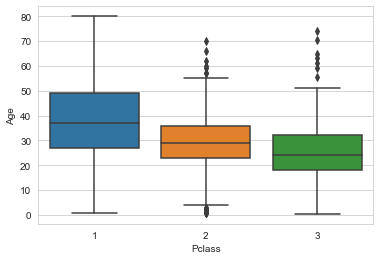

In [69]:
train.groupby("Pclass")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


결측치가 있는 `Age`를 `Pclass`의 평균 나이값을 이용해 대채

In [72]:
train["Age"].sample(10)

693    25.00
469     0.75
206    32.00
546    19.00
120    21.00
829    62.00
250      NaN
29       NaN
776      NaN
794    25.00
Name: Age, dtype: float64

In [74]:
train["Age_nan"] = train["Age"].replace(0, np.nan)

In [99]:
train_mean = train.groupby("Pclass")["Age"].mean()
train_mean

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [110]:
def age_pclass(cols):
    # 직접 작성하시면 됩니다
    train_mean = train.groupby("Pclass")[cols].mean()
    train.loc[(train[cols].isnull()) & (train["Pclass"]==1), cols] = train_mean[1]
    train.loc[(train[cols].isnull()) & (train["Pclass"]==2), cols] = train_mean[2]
    train.loc[(train[cols].isnull()) & (train["Pclass"]==3), cols] = train_mean[3]
    return train[cols]

In [109]:
# age_pclass 함수를 이용해 Age 결측치 채우기
age_pclass("Age")

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    29.87763
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

In [114]:
train["Age"].isnull().sum()

0

#### 범주형 데이터 변환

범주형 데이터는 학습에서 바로 사용이 불가능하기 때문에 수치형으로 변환이 필요합니다.  
예를 들어, `Sex`의 경우 `Male=0`, `Female=1`과 같이 변환을 합니다.

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_nan      714 non-null    float64
 13  Age_fill     714 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


현재 범주형 데이터는, `Name, Sex, Ticket, Embarked`가 있음

#### pd.get_dummies
학습 이전에 모든 데이터를 수치로 변환해주는 전처리 작업이 필요함  
1. 수치형 데이터로 변환
2. 수치화된 데이터를 가변수화

##### Note!!! - 가변수화
수치형 데이터로만 변환하면, **서로 간의 관계성**이 생기게 되어버림
- 월, 화, 수 ... -> 1, 2, 3 ...
- 1+2=3 / 월+화=수라는 관계성이 성립해버림

`pandas`의 `get_dummies` 함수는 원핫인코딩을 이용하는 방식  
`get_dummies(data=, prefix=, prefix_sep=, dummy_na=, columns=, drop_first=, dtype=)` 형식으로 존재함
- data: one-hot encoding을 적용할 데이터
- prefix: 생성할 더미 데이터(가변수화된 데이터)의 컬럼 prefix
- prefix_sep: `default='_'`
- dummpy_na: `NaN`도 포함시킬지, `default=False`
- columns: 대상 컬럼
- drop_first: k개의 범주를 k-1개로 가변수화할 경우 사용
- dtype: 새로운 columns의 데이터 타입

In [160]:
train = train.drop(columns=["Name","Sex","Ticket","Cabin","Embarked","Age_nan","Age_fill"])
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.00000,1,0,7.2500
1,2,1,1,38.00000,1,0,71.2833
2,3,1,3,26.00000,0,0,7.9250
3,4,1,1,35.00000,1,0,53.1000
4,5,0,3,35.00000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000
887,888,1,1,19.00000,0,0,30.0000
888,889,0,3,29.87763,1,2,23.4500
889,890,1,1,26.00000,0,0,30.0000


In [157]:
train_dum = pd.get_dummies(train[["Sex","Embarked"]])
train_dum.columns= ["female","male","C","Q","S"]
train_dum_drop = train_dum.drop(columns=["female","C"])
train_dum_drop

,male,Q,S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [163]:
result= pd.concat([train,train_dum_drop],axis=1, join='inner')
result.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
